<a href="https://colab.research.google.com/github/masifkhan3/CSMB/blob/main/CS_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib


In [ ]:
import pandas as pd

# Creating a DataFrame for the production data
data = {
    'Chemical': ['Caustic Soda', 'Sodium Hypochlorite', 'Hydrochloric Acid', 'Calcium Hypochlorite'],
    'Chemical Formula': ['NaOH', 'NaClO', 'HCl', 'Ca(ClO)2'],
    'Main Use': ['Soap Making, Paper Industry', 'Disinfection, Bleaching', 'Steel Pickling, pH Control', 'Water Treatment'],
    'Production Amount (Tons)': [1000, 500, 750, 300]
}

df = pd.DataFrame(data)

# Display the data
df


,Chemical,Chemical Formula,Main Use,Production Amount (Tons)
0,Caustic Soda,NaOH,"Soap Making, Paper Industry",1000
1,Sodium Hypochlorite,NaClO,"Disinfection, Bleaching",500
2,Hydrochloric Acid,HCl,"Steel Pickling, pH Control",750
3,Calcium Hypochlorite,Ca(ClO)2,Water Treatment,300


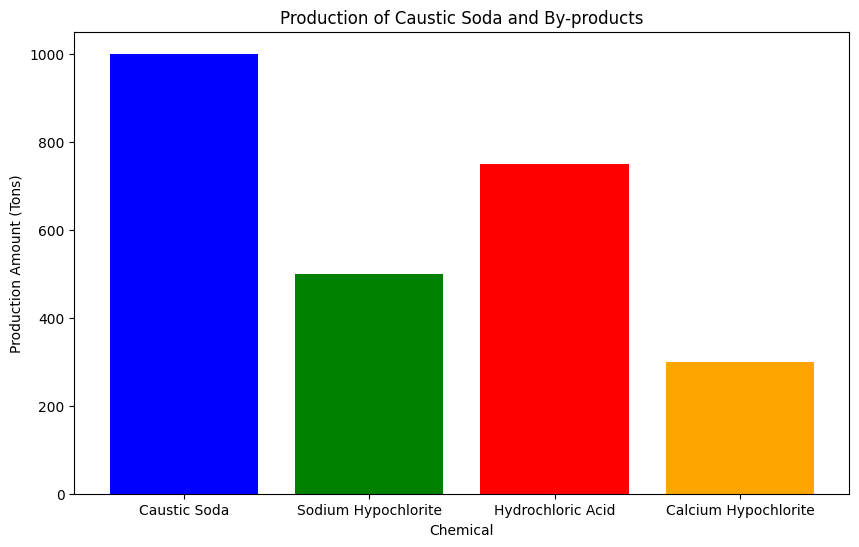

In [ ]:
import matplotlib.pyplot as plt

# Plotting the production data
plt.figure(figsize=(10,6))
plt.bar(df['Chemical'], df['Production Amount (Tons)'], color=['blue', 'green', 'red', 'orange'])
plt.title('Production of Caustic Soda and By-products')
plt.xlabel('Chemical')
plt.ylabel('Production Amount (Tons)')
plt.show()


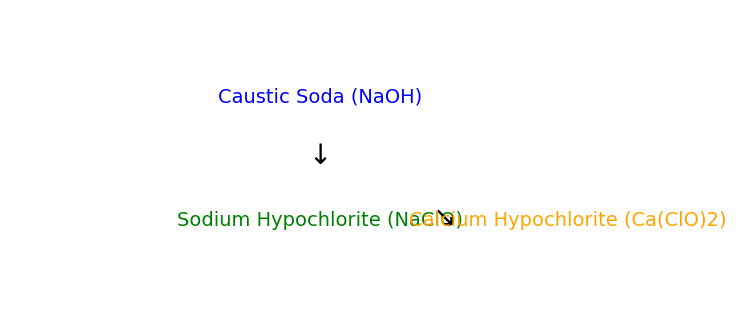

In [ ]:
# A placeholder for a simple process flow (can be replaced by a flowchart image)
plt.figure(figsize=(8,4))
plt.text(0.5, 0.7, "Caustic Soda (NaOH)", ha='center', fontsize=14, color='blue')
plt.text(0.5, 0.5, "↓", ha='center', fontsize=20)
plt.text(0.5, 0.3, "Sodium Hypochlorite (NaClO)", ha='center', fontsize=14, color='green')
plt.text(0.7, 0.3, "↘", ha='center', fontsize=20)
plt.text(0.9, 0.3, "Calcium Hypochlorite (Ca(ClO)2)", ha='center', fontsize=14, color='orange')
plt.axis('off')
plt.show()


In [31]:
# Function to calculate the production of chlorine, HCl, hydrogen, power consumption, and CS ELZ Load
def calculate_chlorine_hcl_hydrogen(caustic_soda_prod, sodium_hypo_prod, liquid_chlorine_prod, stearic_batches, hcl_hydrogen_usage, stearic_hydrogen_usage):
    # Constants for calculations
    chlorine_factor = 0.889  # Chlorine production as a fraction of Caustic Soda production
    hypo_chlorine_usage = 0.22  # 22% of Hypo production uses Chlorine
    chlorine_neutralization = 0.017  # 1.7% of Chlorine is neutralized
    hcl_chlorine_usage = 0.32  # 32% of Chlorine is used to produce HCl
    in_house_hcl = 0.05  # 5% of Caustic Soda used in-house for HCl production
    power_rate_per_ton = 2150.0  # Power consumption per ton of Caustic Soda in KWH
    hydrogen_production_percentage = 0.026  # Hydrogen production as 2.6% of Caustic Soda production

    # ---- Chlorine and HCl calculations ----
    chlorine_production = caustic_soda_prod * chlorine_factor  # Chlorine production based on Caustic Soda
    chlorine_used_in_hypo = sodium_hypo_prod * hypo_chlorine_usage  # Chlorine used in Hypo production
    chlorine_neutralized = chlorine_production * chlorine_neutralization  # Chlorine neutralized
    net_chlorine_available = chlorine_production - chlorine_used_in_hypo - chlorine_neutralized - liquid_chlorine_prod  # Chlorine left for HCl production

    hcl_prod = net_chlorine_available / hcl_chlorine_usage  # HCl production
    hcl_in_house = caustic_soda_prod * in_house_hcl  # HCl used in-house
    net_hcl_for_sale = hcl_prod - hcl_in_house  # HCl available for sale

    # ---- Hydrogen calculations ----
    hydrogen_prod_mt = caustic_soda_prod * hydrogen_production_percentage  # Hydrogen production in metric tons (MT)
    hydrogen_prod_nm3 = hydrogen_prod_mt * 34819 / 3.12  # Convert to normal cubic meters (NM3) based on 3.12 MT

    hydrogen_used_in_hcl = hcl_hydrogen_usage  # Hydrogen used in HCl production
    hydrogen_used_in_stearic = stearic_hydrogen_usage  # Hydrogen used in Stearic Acid batches
    total_hydrogen_usage = hydrogen_used_in_hcl + hydrogen_used_in_stearic  # Total hydrogen used
    balance_hydrogen_nm3 = hydrogen_prod_nm3 - total_hydrogen_usage  # Remaining hydrogen after usage
    balance_waste_percentage = (balance_hydrogen_nm3 / hydrogen_prod_nm3) * 100 if hydrogen_prod_nm3 > 0 else 0  # Percentage of hydrogen wasted

    # ---- Power consumption calculations ----
    total_power_used = power_rate_per_ton * caustic_soda_prod  # Total power used based on production
    power_per_ton_caustic_soda = total_power_used / caustic_soda_prod if caustic_soda_prod > 0 else 0  # Power used per ton of caustic soda

    # ---- CS ELZ Load calculation ----
    cs_elz_load =  caustic_soda_prod / 3.5 if caustic_soda_prod > 0 else 0  # CS ELZ Load calculation

    # ---- Output Results ----
    print(f"Chlorine Production: {chlorine_production:.2f} tons/day")
    print(f"Chlorine Used in Hypo Production: {chlorine_used_in_hypo:.2f} tons")
    print(f"Neutralized Chlorine: {chlorine_neutralized:.2f} tons")
    print(f"Liquid Chlorine Production: {liquid_chlorine_prod:.2f} tons")
    print(f"Net Chlorine Available for HCl: {net_chlorine_available:.2f} tons")
    print(f"Total HCl Production: {hcl_prod:.2f} tons")
    print(f"HCl Used In-House: {hcl_in_house:.2f} tons")
    print(f"Net HCl Available for Sale: {net_hcl_for_sale:.2f} tons")

    # Hydrogen production and usage output
    print(f"\nHydrogen Production: {hydrogen_prod_mt:.2f} MT or {hydrogen_prod_nm3:.2f} NM3")
    print(f"Hydrogen Used in HCl Production: {hydrogen_used_in_hcl:.2f} NM3")
    print(f"Hydrogen Used in Stearic Acid Batches: {hydrogen_used_in_stearic:.2f} NM3")
    print(f"Balance Hydrogen Waste: {balance_hydrogen_nm3:.2f} NM3")
    print(f"Balance Hydrogen Waste Percentage: {balance_waste_percentage:.2f}%")

    # Power consumption output
    print(f"\nTotal Power Consumption for Caustic Soda: {total_power_used:.2f} KWH")
    print(f"Power Consumption per Ton of Caustic Soda: {power_per_ton_caustic_soda:.2f} KWH/ton")

    # CS ELZ Load output
    print(f"CS ELZ Load: {cs_elz_load:.4f}")

# Input data from the user
caustic_soda_prod = float(input("Enter Caustic Soda production in tons (TPD): "))
sodium_hypo_prod = float(input("Enter Sodium Hypochlorite production in tons: "))
stearic_batches = float(input("Enter number of Stearic Acid Batches: "))
liquid_chlorine_prod = float(input("Enter Liquid Chlorine production in tons: "))

# Assuming fixed Hydrogen usage data (can be dynamically added if needed)
hcl_hydrogen_usage = 17228  # Hydrogen used in HCl production (NM3)
stearic_hydrogen_usage = 5400  # Hydrogen used in Stearic Acid production (NM3)

# Call the function to calculate and display the production, by-products, and power consumption
calculate_chlorine_hcl_hydrogen(caustic_soda_prod, sodium_hypo_prod, liquid_chlorine_prod, stearic_batches, hcl_hydrogen_usage, stearic_hydrogen_usage)


Enter Caustic Soda production in tons (TPD): 120
Enter Sodium Hypochlorite production in tons: 70
Enter number of Stearic Acid Batches: 9
Enter Liquid Chlorine production in tons: 30
Chlorine Production: 106.68 tons/day
Chlorine Used in Hypo Production: 15.40 tons
Neutralized Chlorine: 1.81 tons
Liquid Chlorine Production: 30.00 tons
Net Chlorine Available for HCl: 59.47 tons
Total HCl Production: 185.83 tons
HCl Used In-House: 6.00 tons
Net HCl Available for Sale: 179.83 tons

Hydrogen Production: 3.12 MT or 34819.00 NM3
Hydrogen Used in HCl Production: 17228.00 NM3
Hydrogen Used in Stearic Acid Batches: 5400.00 NM3
Balance Hydrogen Waste: 12191.00 NM3
Balance Hydrogen Waste Percentage: 35.01%

Total Power Consumption for Caustic Soda: 258000.00 KWH
Power Consumption per Ton of Caustic Soda: 2150.00 KWH/ton
CS ELZ Load: 34.2857
